# New Section

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


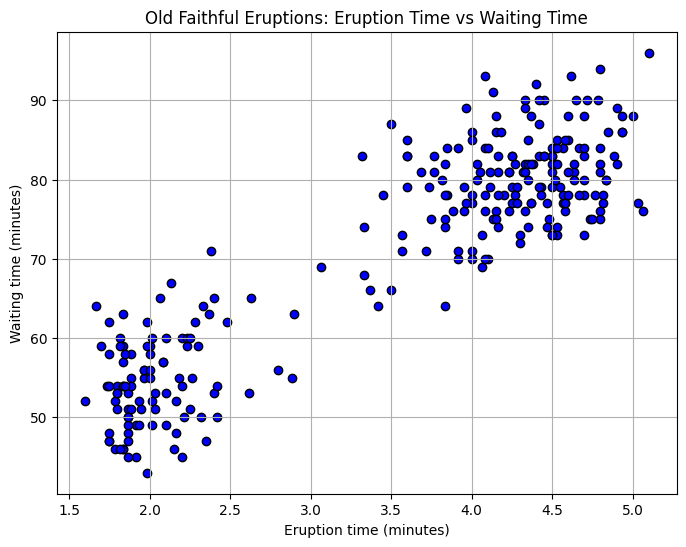


K-Means converged in 4 iterations.


Final Cluster Centroids:

Cluster 1: Eruption = 2.09 mins, Waiting = 54.75 mins
This is Cluster 1 which has Shorter Eruption and Waiting Times.


Cluster 2: Eruption = 4.30 mins, Waiting = 80.28 mins
This is Cluster 2 which has Longer Eruption and Waiting Times.

Points per Cluster:
Cluster 1: 100 points
Cluster 2: 172 points

Final Inertia (Sum of Squared Distances): 8901.77

Sample points from each cluster:

Cluster 1 examples:
    eruptions  waiting
1       1.800       54
3       2.283       62
5       2.883       55
8       1.950       51
10      1.833       54

Cluster 2 examples:
   eruptions  waiting
0      3.600       79
2      3.333       74
4      4.533       85
6      4.700       88
7      3.600       85


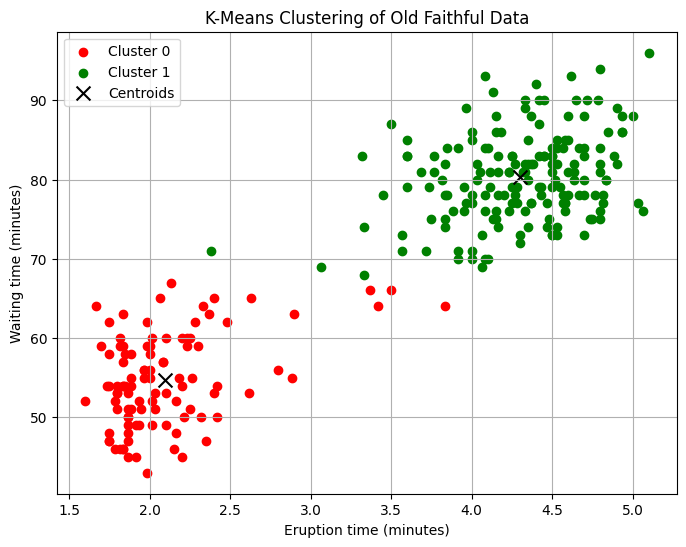

K-Means converged in 4 iterations.
Final Objective Function Value: 8901.77


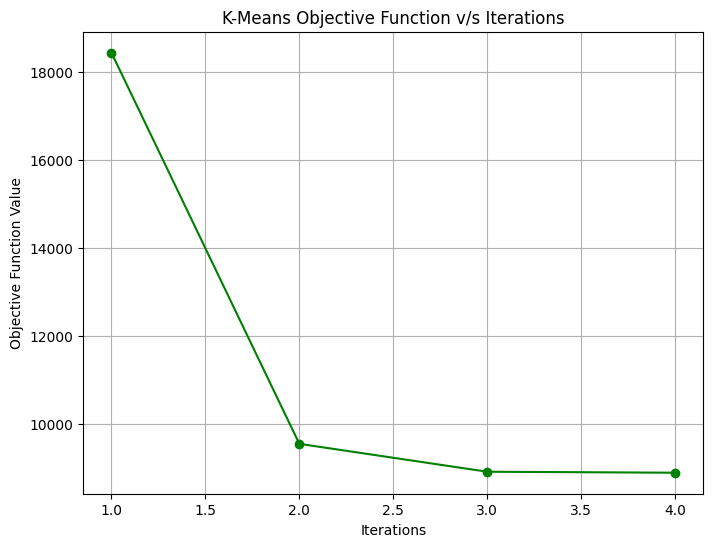

In [11]:
# Homework 3: Old Faithful Geyser Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('faithful.csv')
print(data.head())

## Problem 1a) Scatter plot of eruption time vs waiting time
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', edgecolor='k')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('Old Faithful Eruptions: Eruption Time vs Waiting Time')
plt.grid(True)
plt.show()

## Problem 2a) Implement K-Means from scratch

import pandas as pd
import numpy as np

data = pd.read_csv('faithful.csv')
X = data[['eruptions', 'waiting']].values

k = 2  #Number of Clusters from Problem 1
max_iters = 100
tolerance = 1e-4

np.random.seed(42)
initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
centroids = initial_centroids.copy()

for iteration in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
        break
    centroids = new_centroids

cluster_summary = [(i, centroids[i][0]) for i in range(k)]
cluster_summary.sort(key=lambda x: x[1])

cluster_map = {cluster_summary[0][0]: 1, cluster_summary[1][0]: 2}
renumbered_labels = np.vectorize(cluster_map.get)(cluster_labels)

data['cluster'] = renumbered_labels

print(f"\nK-Means converged in {iteration + 1} iterations.\n")

print(f"\nFinal Cluster Centroids:")
for orig_idx, cluster_num in cluster_map.items():
    center = centroids[orig_idx]
    print(f"\nCluster {cluster_num}: Eruption = {center[0]:.2f} mins, Waiting = {center[1]:.2f} mins")
    if cluster_num == 2:
        print("This is Cluster 2 which has Longer Eruption and Waiting Times.\n")
    else:
        print("This is Cluster 1 which has Shorter Eruption and Waiting Times.\n")

unique, counts = np.unique(renumbered_labels, return_counts=True)
print("Points per Cluster:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} points")

inertia = sum(np.sum((X[cluster_labels == i] - centroids[i]) ** 2) for i in range(k))
print(f"\nFinal Inertia (Sum of Squared Distances): {inertia:.2f}")

print("\nSample points from each cluster:")
for cluster_num in [1, 2]:
    print(f"\nCluster {cluster_num} examples:")
    print(data[data['cluster'] == cluster_num][['eruptions', 'waiting']].head(5))

# 2b) Run K-Means
k = 2
centroids, labels, objective_values = k_means(data, k)

# Scatter plot of final clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green']
for cluster in range(k):
    cluster_points = data.to_numpy()[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster], label=f'Cluster {cluster}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('K-Means Clustering of Old Faithful Data')
plt.legend()
plt.grid(True)
plt.show()

# 2c) Plot Objective Function vs Iterations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

data = pd.read_csv('faithful.csv')
X = data[['eruptions', 'waiting']].values

def k_means_numpy(X, k, max_iters=100, seed=42):
    np.random.seed(seed)
    centers = X[np.random.choice(len(X), k, replace=False)]
    objective_values = []

    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        distances = np.sum((X - centers[labels])**2, axis=1)
        objective = np.sum(distances)
        objective_values.append(objective)

        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return centers, labels, objective_values

k = 2
centers, labels, objective_values = k_means_numpy(X, k)

print(f"K-Means converged in {len(objective_values)} iterations.")
print(f"Final Objective Function Value: {objective_values[-1]:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, color='green',marker='o')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('K-Means Objective Function v/s Iterations')
plt.grid(True)
plt.savefig("K-Means_Objective_versus_Iterations.png", dpi=300)
plt.show()
